# <div style="text-align: center"> Introduction to Python and Machine Learning

## <div style="text-align: center">Machine Learning in Python - Neural Networks (XII)


---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline


# Image analysis

Neural networks are very often used for image or sound analysis. Normal sequential networks with connections all-to-all are used for:
- convolutional neural networks, **CNN**, which are used for image analysis
- recurrent neural networks, **RNN**, which are used for sound analysis

Most often the fun with convolutional networks and image analysis starts with recognizing numbers. However, we will do something a little more interesting / funny - we will play with recognizing whether there is a dog or cat in the picture.  
You will find the data you need for this here: https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition  
<br><br>
On the `data` tab of this page there are two downloadable `train.zip` and `test.zip` files. Just download the `train.zip` and then extract to the folder where this notebook is located to the `cats_vs_dogs` folder, the subfolder `train`.

In [3]:
from keras.preprocessing.image import load_img, img_to_array

We load the names of image files:

In [4]:
import os

img_dir = r'C:\DATA\train\train'
images = os.listdir(img_dir)
images[:3]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg']

In [5]:
full_images = [os.path.join(img_dir, img) for img in images]

In [6]:
full_images[:3]

['C:\\DATA\\train\\train\\cat.0.jpg',
 'C:\\DATA\\train\\train\\cat.1.jpg',
 'C:\\DATA\\train\\train\\cat.10.jpg']

In [7]:
full_images

['C:\\DATA\\train\\train\\cat.0.jpg',
 'C:\\DATA\\train\\train\\cat.1.jpg',
 'C:\\DATA\\train\\train\\cat.10.jpg',
 'C:\\DATA\\train\\train\\cat.100.jpg',
 'C:\\DATA\\train\\train\\cat.1000.jpg',
 'C:\\DATA\\train\\train\\cat.10000.jpg',
 'C:\\DATA\\train\\train\\cat.10001.jpg',
 'C:\\DATA\\train\\train\\cat.10002.jpg',
 'C:\\DATA\\train\\train\\cat.10003.jpg',
 'C:\\DATA\\train\\train\\cat.10004.jpg',
 'C:\\DATA\\train\\train\\cat.10005.jpg',
 'C:\\DATA\\train\\train\\cat.10006.jpg',
 'C:\\DATA\\train\\train\\cat.10007.jpg',
 'C:\\DATA\\train\\train\\cat.10008.jpg',
 'C:\\DATA\\train\\train\\cat.10009.jpg',
 'C:\\DATA\\train\\train\\cat.1001.jpg',
 'C:\\DATA\\train\\train\\cat.10010.jpg',
 'C:\\DATA\\train\\train\\cat.10011.jpg',
 'C:\\DATA\\train\\train\\cat.10012.jpg',
 'C:\\DATA\\train\\train\\cat.10013.jpg',
 'C:\\DATA\\train\\train\\cat.10014.jpg',
 'C:\\DATA\\train\\train\\cat.10015.jpg',
 'C:\\DATA\\train\\train\\cat.10016.jpg',
 'C:\\DATA\\train\\train\\cat.10017.jpg',
 'C:\\D

<div class="alert alert-block alert-success">
⚠️TASK 1
<br>

Using the `load_img()` function, plese display a any photo from the database (check how many photos are there, btw).

</div>

Displaying a photo:

In [9]:
full_images[0]

'C:\\DATA\\train\\train\\cat.0.jpg'

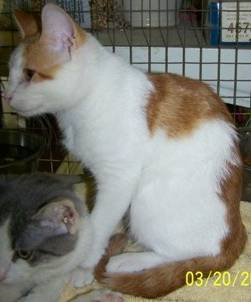

In [11]:
image_index = 6482
load_img(full_images[image_index])

<div class="alert alert-block alert-success">
⚠️TASK 2
<br>

Change the code below to load another photo. Do so several times to view different photos. 
* Which index of `image_index` do the dog pictures start with?
* Problems were reported to the datasheet we use. Check the files discussed in the comments below:
  > Image cat.7377.jpg is labelled as a cat. However it is a person. Not a dog, not a cat. Why is it in the data?
  
  and:
  
  > Unless there is a cat in 1 pixel of this image I can't see, image cat.4085.jpg is clearly a dog to me.

</div>

In [13]:
img_dir + '\\cat.7377.jpg'

'C:\\DATA\\train\\train\\cat.7377.jpg'

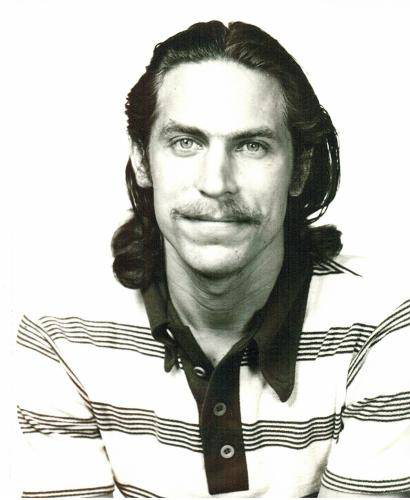

In [14]:
load_img(img_dir + '\\cat.7377.jpg')

cat.4085.jpg

In [15]:
cat_or_dog = 'cat'
image_index = 4085
img_file = f'{cat_or_dog}.{str(image_index)}.jpg'
img_path = os.path.join(img_dir, img_file)

print(img_path)
load_img(img_path)

In [16]:
img_path

'C:\\DATA\\train\\train\\cat.4085.jpg'

Check also the picture 11222. Is it labelled as a cat or dog? Is it a cat or a dog? :)

In [22]:
cat_or_dog = 'cat'
image_index = 11222
img_file = f'{cat_or_dog}.{str(image_index)}.jpg'
img_path = os.path.join(img_dir, img_file)

img = load_img(img_path)

C:\DATA\train\train\cat.11222.jpg


C:\DATA\train\train\cat.11222.jpg


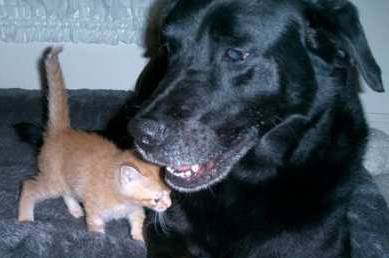

In [24]:
print(img_path)
img

<div class="alert alert-block alert-success">
⚠️TASK 3
<br>

Each photo does not only consist of width and highth - it also consists of three layers for red (**R**), green (**G**) and blue (**B**) color. Create a matrix below from the image in the `img` variable (created in the cell above), using the `img_to_array` function (already imported above) - save the result in the `img_arr` variable. Then check the shape of the `img_arr` matrix.
    
</div>

(299, 308, 3)

Now let's display R, G and B layers separately:

(-0.5, 307.5, 298.5, -0.5)

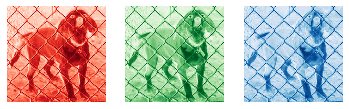

In [17]:
fig, ax = plt.subplots(ncols=3)

# we pull out the layers one by one:
ax[0].imshow(img_arr[:, :, 0], cmap='Reds')
ax[1].imshow(img_arr[:, :, 1], cmap='Greens')
ax[2].imshow(img_arr[:, :, 2], cmap='Blues')

# we turn off the axle markings:
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

We'll create a function for showing rgb layers

In [34]:
def show_rgb_layers(image, subplots_args=dict()):
    '''
    Show RGB layers of the image on separate axes.
    '''
    
    im_shape = image.shape
    
#     check if the loaded image has 3 dimensions
    assert image.ndim == 3
#     check whether the last dimension of im_shape has 3 dimensions
    assert im_shape[-1] == 3
    
#     plot rgb layers
    fig, ax = plt.subplots(ncols=3)
    for idx, layer in enumerate(['Reds', 'Greens', 'Blues']):
        ax[idx].imshow(image[:, :, idx], cmap=layer)
    
    return fig

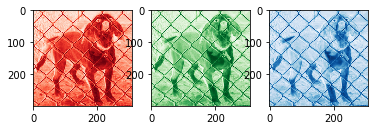

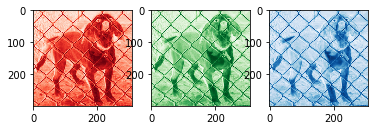

In [35]:
show_rgb_layers(img_arr)

Please note that the training photos are in different sizes, so we have to convert them all to the same size (the network must have the same input each time). Moreover, to save time on training we will reduce the photos to the size of 50 by 50 pixels. We use the `target_size` argument in the code below to display a reduced image (we want 50 by 50 pixels):

Text(0.5, 1.0, 'dog.10120.jpg')

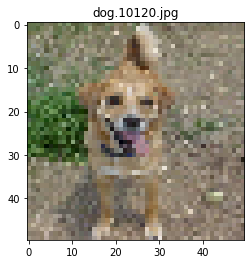

In [37]:
image_index = 12639
img = load_img(full_images[image_index], target_size=(50, 50))
plt.imshow(img)
plt.title(images[image_index])

## Convolution

In the case of neural networks, the convolution is analyzed in two dimensions. The original image is transformed by means of a convolution - each pixel is created again by multiplying by a filter (*kernel*) a given pixel and its neighbors and then adding up the obtained values:  
<img src=https://media0.giphy.com/media/XoxWy6GneEKt2/source.gif> 

![img2](https://miro.medium.com/max/1280/1*C_rDXqPy0lzv9549g1i-0A.gif)

For convolutional neural networks (**CNN**), neurons learn the filter weights used in the convolution.  
First, however, a few examples, to better understand the 2d convolution and its usefulness for image analysis.

<div class="alert alert-block alert-info">
📺 ************* WATCH AT HOME *************
<br>

[Introducing convolutional neural networks](https://www.youtube.com/watch?v=x_VrgWTKkiM)
<br><br>
Longer video:<br>
[A friendly introduction to Convolutional Neural Networks and Image Recognition](https://www.youtube.com/watch?v=2-Ol7ZB0MmU)

</div>

Below we load one selected image, then average its RGB dimension to obtain a black and white image, and finally we display the image. Fill in the code below:

(-0.5, 498.5, 422.5, -0.5)

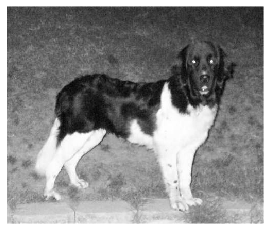

In [43]:
# We're loading a picture
image_index = 12856
test_image = img_to_array(load_img(full_images[image_index]))

# Let's average the RGB dimension
test_image_gr = test_image.mean(axis=2)

# We're displaying
plt.imshow(test_image_gr, cmap='gray')

# to get rid of the pixel indexes on the axes:
plt.axis('off')

### Examples of different convolutions

Każdy splot to operacja na obrazie oraz filtrze, poniżej zobaczycie kilka przykładów filtrów oraz tego jaki efekt daje splecienie ich z psim pyszczkiem na obrazie.

Each convolution is an operation on the image and a filter, below you will see some examples of filters and the effect of convoluting them with the dog's muzzle on the image.

(-0.5, 2.5, 2.5, -0.5)

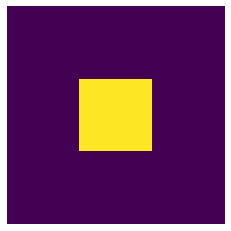

In [47]:
# we create a filter - it's a matrix of numerical values
kernel1 = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
# we display a filter - we use imshow to display the matrix as an image
plt.imshow(kernel1)
plt.axis('off')

We're loading the `convolve2d` from scipy to perform the convolution.

In [48]:
from scipy.signal import convolve2d

The arguments for `convolve2d` are:
* the first is a picture of a black and white dog's muzzle (the picture that we want to mingle with the filter)
* the second one is the created filter (`kernel1`):

(-0.5, 500.5, 424.5, -0.5)

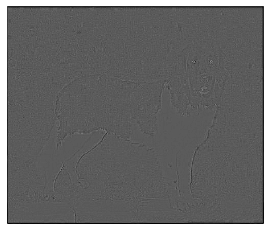

In [49]:
convolved_image1 = convolve2d(test_image_gr, kernel1)

plt.imshow(convolved_image1, cmap='gray')
plt.axis('off')

(-0.5, 2.5, 2.5, -0.5)

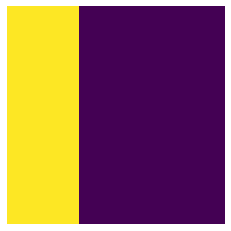

In [50]:
kernel2 = np.array([[2, -1, -1],
                    [2, -1, -1],
                    [2, -1, -1]])
plt.imshow(kernel2)
plt.axis('off')

(-0.5, 500.5, 424.5, -0.5)

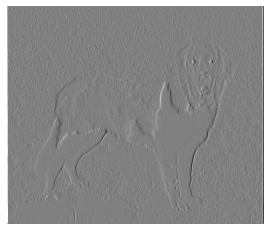

In [51]:
convolved_image2 = convolve2d(test_image_gr, kernel2)

plt.imshow(convolved_image2, cmap='gray')
plt.axis('off')

(-0.5, 3.5, 3.5, -0.5)

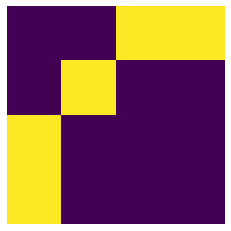

In [52]:
kernel3 = np.array([[-1, -1, 2, 2],
                   [-1, 2, -1, -1],
                   [2, -1, -1, -1],
                   [2, -1, -1, -1]])
plt.imshow(kernel3)
plt.axis('off')

(-0.5, 501.5, 425.5, -0.5)

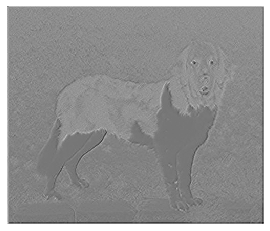

In [53]:
convolved_image3 = convolve2d(test_image_gr, kernel3)

plt.imshow(convolved_image3, cmap='gray')
plt.axis('off')

Notice that this last filter reacts quite strongly to the eye area:

(-0.5, 501.5, 425.5, -0.5)

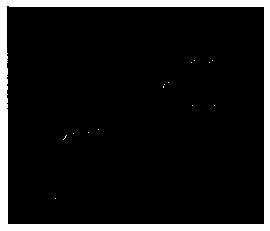

In [54]:
# we only display high values of the last convolution
plt.imshow(convolved_image3 > 220, cmap='gray')
plt.axis('off')

### A combination of filters and 2d conviolution effects

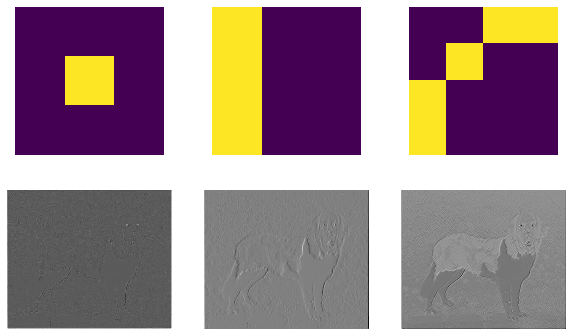

In [56]:
# we create a list of all filters and effects on one chart
# the first we create the chart itself, consisting of several panels
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# We complete the first line
ax[0, 0].imshow(kernel1)
ax[0, 1].imshow(kernel2)
ax[0, 2].imshow(kernel3)

# We complete the second line
ax[1, 0].imshow(convolved_image1, cmap='gray')
ax[1, 1].imshow(convolved_image2, cmap='gray')
ax[1, 2].imshow(convolved_image3, cmap='gray')

# We disable axle markings for all panels
for a in ax.ravel():
    a.axis('off')

How can convolutions be useful for image analysis? We can treat individual filters as detectors of simple features - by making a convolution we find out what is the intensity of these features in different parts of the image. The network can learn such filter weights that help in image classification.  
It is worth knowing and remembering that:
* we are now replacing simple neurons that are connected to one another with the convolution operation. This is based on the belief that there is no need to create separate connections for the left lower part of an image and the upper right part (for example) - the dog in one and the other corner should look similar. Therefore, we want to find good detectors (filters) with which we will scan the entire image space
* each layer of the neural network now consists not of neurons but of filters (of a certain size e.g. 3 by 3 pixels). The network learns the weights for the filters, but with a given filter we scan the entire image in the same way (we make a convolution). The convolution effect is the input for the next layer of the network.
* In addition to the height and width dimensions, the input image also has depth (Red, Green and Blue - RGB layers), so in fact the first network layer learns the 3D filters (including height, width and colour layers).
* Each filter is intertwined with the input image, so if the first network layer consists of 8 filters, you make 8 different convolutions and the next network layer gets 8 transformations of the original image. The dimensions of the input that the next network layer gets are in this case `height x width x 8`. Therefore, the filters that this next layer consists of have the weight of `filter height x width x filter x 8`.
* the first convolution network layers usually learn simple detectors - lines of different orientation, subsequent layers use the detected lines to detect more complex edges, e.g. curves; the subsequent layers start to build shapes from them; and so on - the complexity of what the filters detect increases with the subsequent network layers, as the subsequent filters look for certain combinations of filters from the previous layer (so by combining two semi-circle detectors you can create a circle detector). 
  
Above we can also see a schematic diagram of neural network convolution architecture. So far we have discussed the `Conv` weave from *convolution*, but the network still includes *max-pooling* operations. Max pooling is fortunately a very simple operation reducing the dimensions of data coming out of the previous layer of the network - we divide this data into parts, each of them e.g. 3 by 3 and from each part we take only the maximum value. Example below:  
<img src=https://qph.fs.quoracdn.net/main-qimg-8afedfb2f82f279781bfefa269bc6a90>
  
We see that for the red part the maximum value is 6, for the yellow part it is 3 etc.  
Just notice that in the first diagram in this cell at the very end (the last layers of the network) we perform the 'extension'/'expansion' operation (*flatten*) of the previous layer to a sequence of figures (like in the previous classes). The last layers of the network already operate in the classic form of neurons connected to each other. We must finally simply integrate all the properties detected by our network layers and decide what the image presents (this decision is the activity of the neuron/neurons of the last network layer).

## We're loading images
We load 10000 images, 5000 each per category (training on all would take too long).

In [57]:
from imports_for_ML import load_images

X, y = load_images(img_dir, n_images=10000, resize=(50, 50))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


After loading, we divide the photos into training and test photos. We have as many as 10 000 images, so we can spend only 10% (we could spend even less, even 2%) on test data, 10% of 10 000 are still 1000 images:

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

First, we read in the objects we know from Keras: Sequential and Dense:

In [59]:
from keras.models import Sequential
from keras.layers import Dense

For CNN-type networks we need additional layer types `Conv2D` (convolution layer), `MaxPooling2D` (previously described *max pooling*) and `Flatten` (for unrolling/unrolling the network at the end):

In [60]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

We will now build a sample model to classify whether the picture shows a dog or a cat. The choice of layers and their order could be different, do not be convinced that the architecture below is most right or appropriate for this task - it is often difficult to predict in advance what exactly the network architecture will be good for the problem. Our network will consist of:
* five hidden layers, four convolution layers and one 'dense' (all to all connection).
* The first two convolution layers will consist of 16 filters, each 3 x 3 (plus depth). The activation function for these layers is standard `relu`.
* after the two convolution layers we will perform a maximum pooling operation, dividing the image into segments of 3 x 3 and for each one selecting the maximum (pool_size=(3, 3))
* then we add two more convolution layers, this time each consisting of 32 filters, each 3 x 3
* again we use max pooling, but this time we divide the data into smaller segments - 2 by 2
* at the end, we roll out the previous layer into one vector (*flatten*) and add a normal layer with 64 neurons
* the output layer is just one neuron (Dense type) that tells us whether or not there's a dog in the picture, with the sigmoid activation

Remember that the architecture of this network can be changed in different ways, which can translate into e.g. improved classification (the proposed project at the end of the course is e.g. playing with network parameters). Over the past few years, neural network researchers from all over the world have tested many different architectures, which have led to a better and better recognition of images and a better understanding of why some architectures can work better and others worse (and I'm talking about architectures in a slightly broader context - many ideas were studied beyond the number of layers and the order of their arrangement).

<div class="alert alert-block alert-success">
⚠️TASK 4
<br>

Create the model based on the information above.
    
</div>

In [61]:
model = Sequential()

# we create two convolution layers, then max pooling


# we create next two convolution layers, then max pooling


# finally, we flatten all the filters to one vector and then add 64 ordinary neurons


# and the output neuron that says dog (1) or cat (0)


# and compile, like always before








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
__________

Note that the network has a total of more than 68 thousand parameters (filter weights and connection weights) - and we have built quite a small network to modern standards.

Training a large network on a computer without GPU support will take a long time, so we will only set the number of epochs to `10`. In addition to the waiting time for this number of parameters (relative to the images used in training) in many epochs we can easily overtrain the network leading to great accuracy on training data, but weak on test data. The risk of overtraining is quite possible because we do not use any regularization (about this later).

<div class="alert alert-block alert-success">
⚠️TASK 5
<br>

Fit the model. No. of epochs = 10 (or more if you wish to wait for a longer time :) )
    
</div>

In [14]:
history = 

Epoch 1/10
9000/9000 [==============================] - 53s 6ms/step - loss: 0.8588 - acc: 0.5609
Epoch 2/10
9000/9000 [==============================] - 51s 6ms/step - loss: 0.6553 - acc: 0.6142: 4s -
Epoch 3/10
9000/9000 [==============================] - 52s 6ms/step - loss: 0.6269 - acc: 0.6450
Epoch 4/10
9000/9000 [==============================] - 52s 6ms/step - loss: 0.6000 - acc: 0.6749
Epoch 5/10
9000/9000 [==============================] - 52s 6ms/step - loss: 0.5660 - acc: 0.7049
Epoch 6/10
9000/9000 [==============================] - 52s 6ms/step - loss: 0.5455 - acc: 0.7252
Epoch 7/10
9000/9000 [==============================] - 52s 6ms/step - loss: 0.5215 - acc: 0.7429
Epoch 8/10
9000/9000 [==============================] - 52s 6ms/step - loss: 0.4899 - acc: 0.7603
Epoch 9/10
9000/9000 [==============================] - 51s 6ms/step - loss: 0.4649 - acc: 0.7766
Epoch 10/10
9000/9000 [==============================] - 52s 6ms/step - loss: 0.4293 - acc: 0.7997


NOTE! If for many epochs you still have a 50% correctness (e.g. `acc: 0.5001`) build the network again, i.e. restart the cell building the network (you can interrupt your notebook via `kernel -> interrupt`) and start training again. It may happen that the network gets a little 'chocked' when the weights are not properly initialized.  
Note that after a second pass through the data (epoch) the correctness is over 60% and grows relatively fast in subsequent passes. Unfortunately, this may be too good to be true - it may suggest that the network remembers examples instead of learning patterns to help identify dogs and cats. 
However, it may be that the network you are training is gradually learning and doesn't reach a speed of over 90% - a sign that your training may take a little longer and the network is learning well.
Let's check it out - let's see how correct we are on the training and test data (if on the test data the correctness is much lower then we are dealing with overtraining i.e. *overfitting*). This time we will use a convenient method of the network `.evaluate()`, which gives us data and true answers, and which returns the cost/loss of the network and correctness (we will only be interested in correctness now):

In [ ]:
plt.plot(history.history['acc'])
plt.ylabel('Accuracy')

print('Accuracy on the training data:')
print(model.evaluate(_______, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, _______)[1])